In dept analysis of the exposure variables:
1. Issolaition of the advertisement group
2. Analysis of total ads column
3. Analysisis of most ads day column
4. Analysis of most ads hour column

Imports

In [1]:
#Libraries
import pandas as pd

#Import support files src where is the chi squared function
import sys
sys.path.append("..")
from src import chi_square
from src import ExposureVariables

In [2]:
#Dataframe
df_analysis=pd.read_csv(r"C:\Users\matis\Desktop\DataAnalyticsPractice\ABTestPractice\ABTestPractice1\data\marketing_AB.csv", usecols=lambda col: not col.startswith("Unnamed"))

In [3]:
#Issolation of the advertisement group
df_analysis=df_analysis[df_analysis["test group"]=="ad"]



In [4]:
#comprobación
df_analysis["test group"].value_counts()

test group
ad    564577
Name: count, dtype: int64

In [5]:
df_analysis.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

## Total ads column
Biserial correlation to chech the correlation of the total amount of ads and the number of subscriptions

In [6]:
#biserial correlation to detect statistical significance
ExposureVariables.point_biserial_correlation(df_analysis,"total ads","converted")

Point Biserial Correlation (total ads vs converted): 0.2187
P-value: 0.0000
P-value:(full precision): 0.00000000000000000000
The relationship is statistically significant.


(np.float64(0.2186553651460445), np.float64(0.0))

With biserial corelation the test shows a extremely small p-value so there is needed another validation test to compare the significance to validate the results:

Non linear logistic regresion


In [7]:
ExposureVariables.logistic_regression_with_quadratic(df_analysis,"total ads","converted")

Model coefficients for total ads and total ads^2:
Coefficients: [[ 3.24955963e-02 -6.18733890e-05]]
Intercept: [-4.74342206]

Confusion Matrix:
[[165012      0]
 [  4362      0]]

Classification Report:


c:\Users\matis\Desktop\DataAnalyticsPractice\ABTestPractice\ABTestPracticePy12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matis\Desktop\DataAnalyticsPractice\ABTestPractice\ABTestPracticePy12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matis\Desktop\DataAnalyticsPractice\ABTestPractice\ABTestPracticePy12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

              precision    recall  f1-score   support

       False       0.97      1.00      0.99    165012
        True       0.00      0.00      0.00      4362

    accuracy                           0.97    169374
   macro avg       0.49      0.50      0.49    169374
weighted avg       0.95      0.97      0.96    169374

Optimization terminated successfully.
         Current function value: 0.101786
         Iterations 9

Logistic Regression Summary (statsmodels):
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               564577
Model:                          Logit   Df Residuals:                   564574
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.1440
Time:                        13:30:22   Log-Likelihood:                -57466.
converged:                       True   LL-Null:     

Even though tis logistic regression model is not well trained and can't be used to predic wich amount of ads can make more conversions, we can detect 0.000 p-values so we can assume that statistical significance is validated.

Further,there is going to be conducted a frequence analysis to detect wich levels of ads are relationed with bigger conversion ratios

In [8]:
ExposureVariables.plot_conversion_ratio_with_scroll_plotly(df_analysis,"total ads","converted")

In [9]:
ExposureVariables.plot_conversion_by_intervals(df_analysis,"total ads","converted")

It can be concluded that users exposed to more than 27 ads have the greatest conversion rates 

## Most ads day column

Chi square test in order to detect relevant significance with the conversions
H0: There is no relevant significance between most ads day and converted
H1: There is relevant significance between most ads day and converted

In [10]:
#detecting if there is significance
chi_square.chi_squared_test(df_analysis,"most ads day","converted")

Contingency Table: converted     False  True 
most ads day              
Friday        86810   1995
Monday        80793   2778
Saturday      77123   1679
Sunday        80305   2027
Thursday      77366   1711
Tuesday       72302   2270
Wednesday     75455   1963

Chi2 Stat: 412.79432508817627

P-value: 4.9594891936593376e-86

Degrees of Freedom: 6

Expected Frequencies: [[86536.33777146  2268.66222854]
 [81436.0484646   2134.9515354 ]
 [76788.88000751  2013.11999249]
 [80228.70065199  2103.29934801]
 [77056.85470361  2020.14529639]
 [72666.94195477  1905.05804523]
 [75440.23644605  1977.76355395]]

Statistical Significance (0.05): Significant with 0.05 significance

Statistical Significance (0.01): Significant with 0.01 significance



In [11]:
#Table with conversion rates per day 
# Define order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Order most ads day
df_analysis['most ads day'] = pd.Categorical(df_analysis['most ads day'], categories=ordered_days, ordered=True)

# Group by day of the week and calculate conversion rate
conversion_rate_by_day = df_analysis.groupby('most ads day')['converted'].mean()

# Order by monday to friday
conversion_rate_by_day_sorted = conversion_rate_by_day.sort_index()

# Show results
print(conversion_rate_by_day_sorted)

most ads day
Monday       0.033241
Tuesday      0.030440
Wednesday    0.025356
Thursday     0.021637
Friday       0.022465
Saturday     0.021307
Sunday       0.024620
Name: converted, dtype: float64


C:\Users\matis\AppData\Local\Temp\ipykernel_1900\3799092690.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [12]:
#conversion rate calculation
df_analysis['converted'].mean()

np.float64(0.025546559636683747)

Having that conversion rate is 0.025547 and that there is a significant relation with the days of the week there is detected that Monday and Tuesday are the days that optimize the conversion rate due to the increase of almos a 20% on the conversion date in these values.

## Most ads hour column
Chi square test in order to detect relevant significance between the hou where the advert is published and the conversions

In [13]:
chi_square.chi_squared_test(df_analysis,"most ads hour", "converted")

Contingency Table: converted      False  True 
most ads hour              
0               5207    102
1               4553     62
2               5113     39
3               2563     27
4                683     11
5                726     16
6               1939     46
7               6054    114
8              16631    337
9              29220    582
10             36636    818
11             43157    992
12             44146   1092
13             44345   1140
14             42528   1251
15             41576   1279
16             34852   1111
17             32646    959
18             30199    853
19             28387    782
20             27003    843
21             28052    843
22             24840    675
23             19098    449

Chi2 Stat: 403.32698566404406

P-value: 3.671278759525808e-71

Degrees of Freedom: 23

Expected Frequencies: [[5.17337331e+03 1.35626685e+02]
 [4.49710263e+03 1.17897373e+02]
 [5.02038412e+03 1.31615875e+02]
 [2.52383441e+03 6.61655895e+01]
 [6.7627068

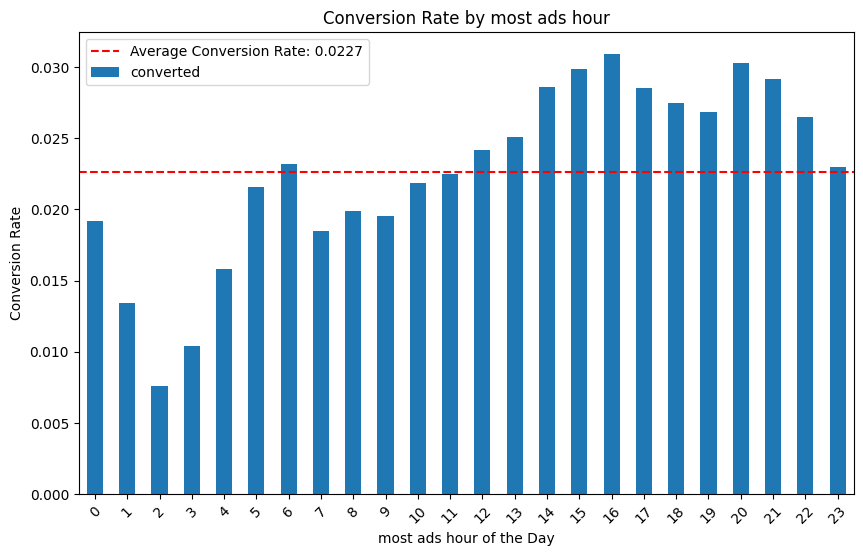

In [ ]:
ExposureVariables.plot_conversion_rate_by_hour(df_analysis,"most ads hour","converted")

Adverts at 6 am and after 12 am are more effective than the average.

## Conclusions
1. Sending more than 27 adverts up to  2000 contains the largest conversion rates with 0.0835
2. Monday and Tuesday are the days that optimize the conversion rate due to the increase of almos a 20% on the conversion date in these values.
3. Adverts at 6 am and after 12 am are more effective than the average.